# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

import pandas as pd

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("product_sales.csv")
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois



![Screenshot 2024-06-27 131422](Screenshot%202024-06-27%20131422.png)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
df["week"].unique(),df["week"].nunique()

(array([2, 6, 5, 4, 3, 1]), 6)

Cleaning Data
- Changing the sales_method values to only 3 Unique values: 'Email','Email + Call', 'Call'

In [5]:
df["sales_method"].unique(),df["sales_method"].nunique()

(array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
       dtype=object),
 5)

In [6]:
df["sales_method"] = df['sales_method'].str.replace('em + call', 'Email and Call', regex=False)

In [7]:
df["sales_method"] = df['sales_method'].str.replace('Email + Call', 'Email and Call', regex=False)

In [8]:
df["sales_method"] = df['sales_method'].str.replace('email', 'Email', regex=False)

In [9]:
df['sales_method'].unique()

array(['Email', 'Email and Call', 'Call'], dtype=object)

Now we only have 3 sales method matching with description

Dealing with missing values
- Check what percent of missing values 

Only revenue column have missing values

In [10]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [11]:
print((df["revenue"].isna().sum() / len(df)*100))

7.16


Because the revenue columns have more than 5 percent then we need stats imputation 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='revenue'>

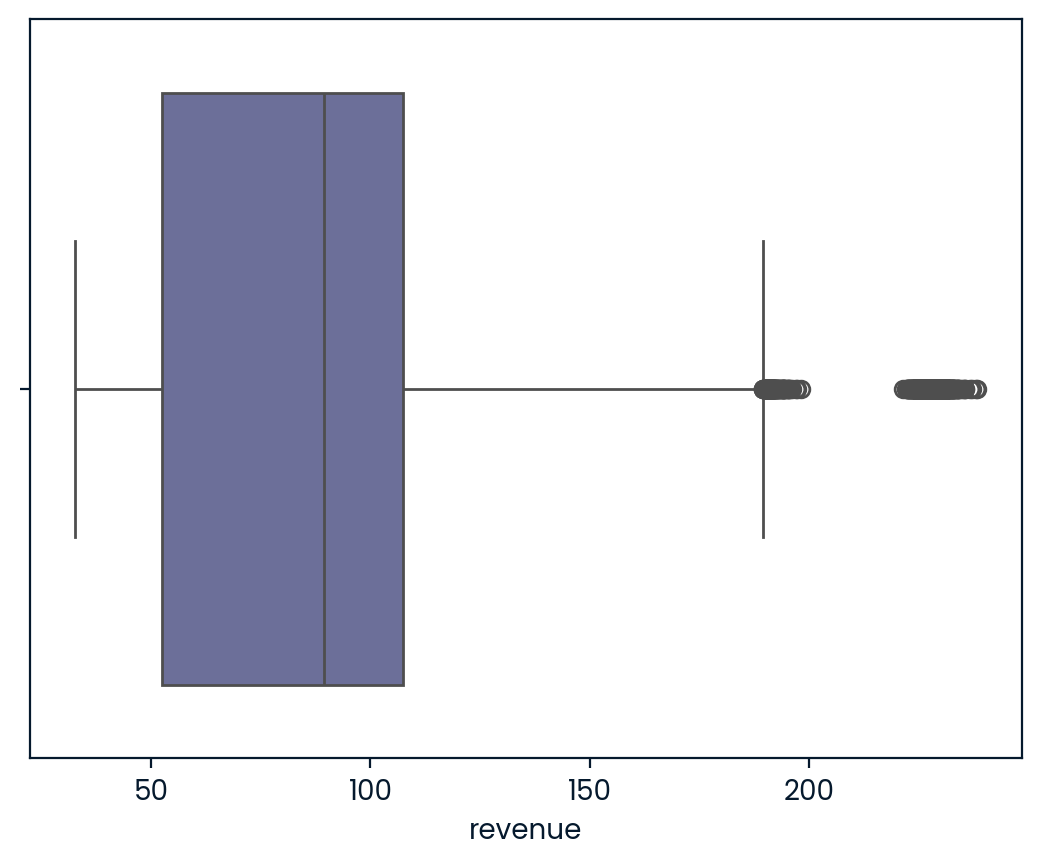

In [13]:
sns.boxplot(x="revenue",data=df)

<AxesSubplot: xlabel='revenue', ylabel='Count'>

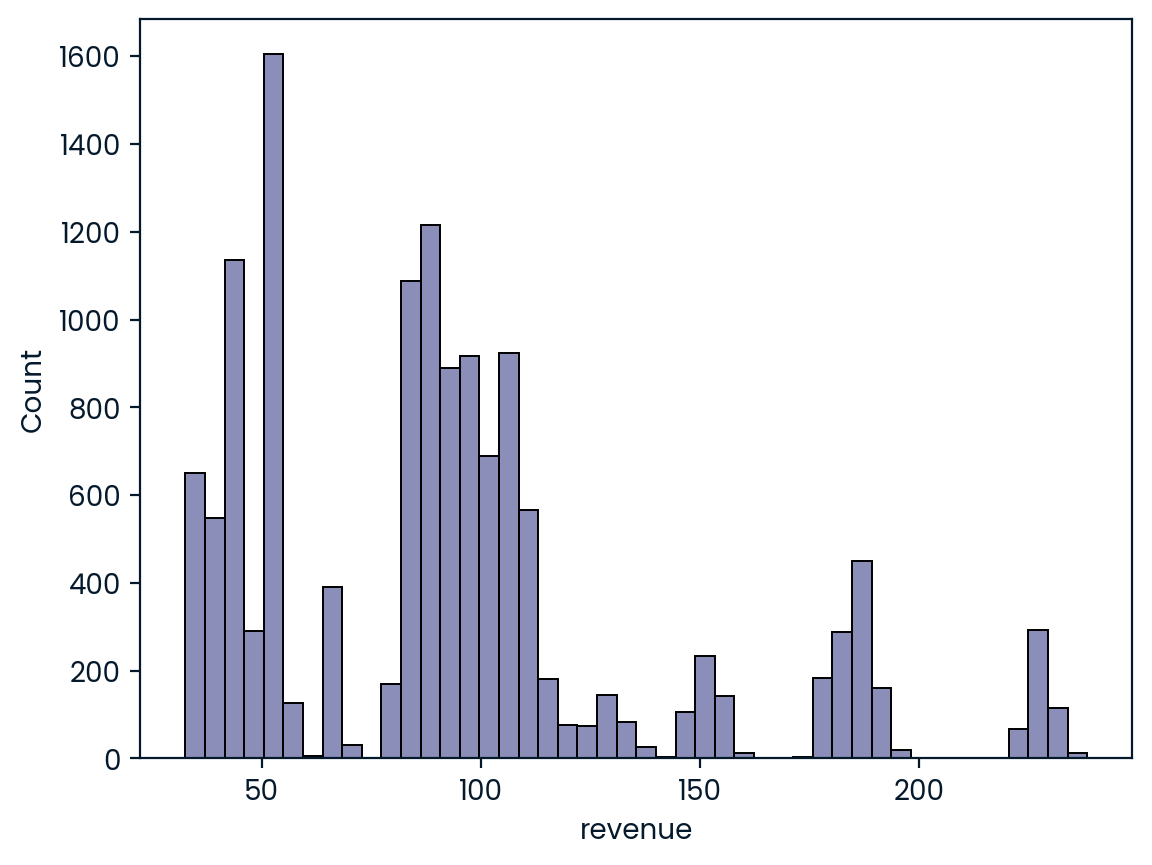

In [14]:
sns.histplot(x="revenue",data=df)

because revenue column has skewed, Median imputation is appropriate

In [15]:
revenue = df.groupby("sales_method")["revenue"].median()
revenue_dict = revenue.to_dict()

df["revenue"] = df["revenue"].fillna(df["sales_method"].map(revenue_dict))

In [16]:

print(revenue)
print(df.isna().sum())

sales_method
Call               49.07
Email              95.58
Email and Call    184.74
Name: revenue, dtype: float64
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


Checking outliers 
- Years Customer
- Number site visits
- Revenue

Removing outliers from column Years Customers

<AxesSubplot: xlabel='sales_method', ylabel='years_as_customer'>

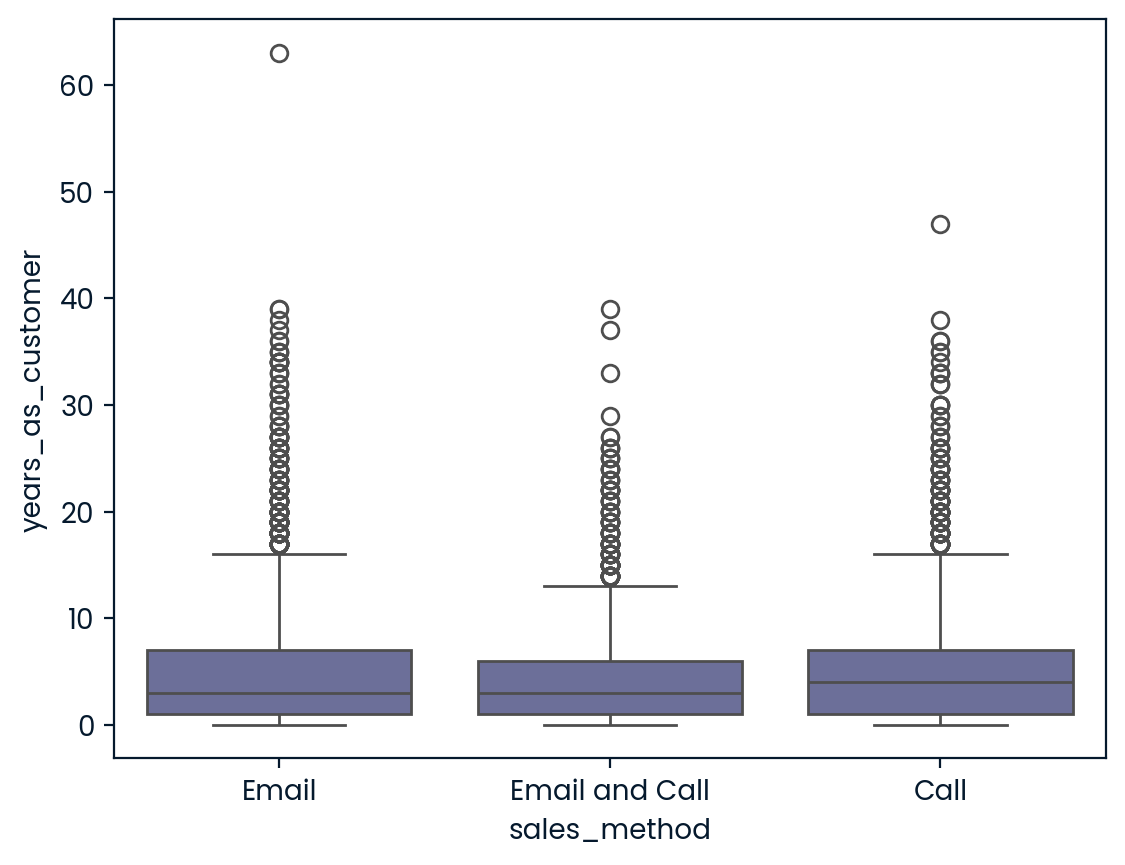

In [17]:
sns.boxplot(x="sales_method",y="years_as_customer",data=df)

In [18]:
df = df.loc[df["years_as_customer"] <= 40] 

<AxesSubplot: xlabel='sales_method', ylabel='years_as_customer'>

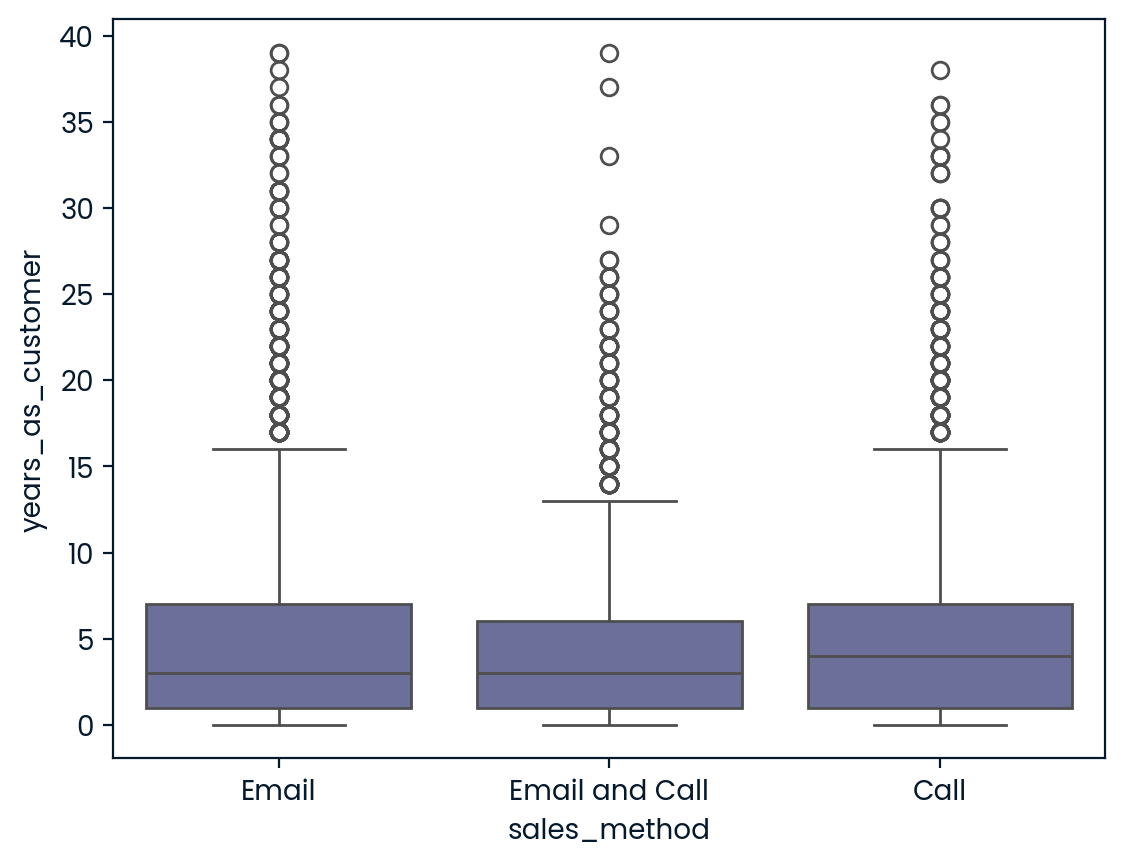

In [19]:
sns.boxplot(x="sales_method",y="years_as_customer",data=df)

<AxesSubplot: xlabel='sales_method', ylabel='nb_site_visits'>

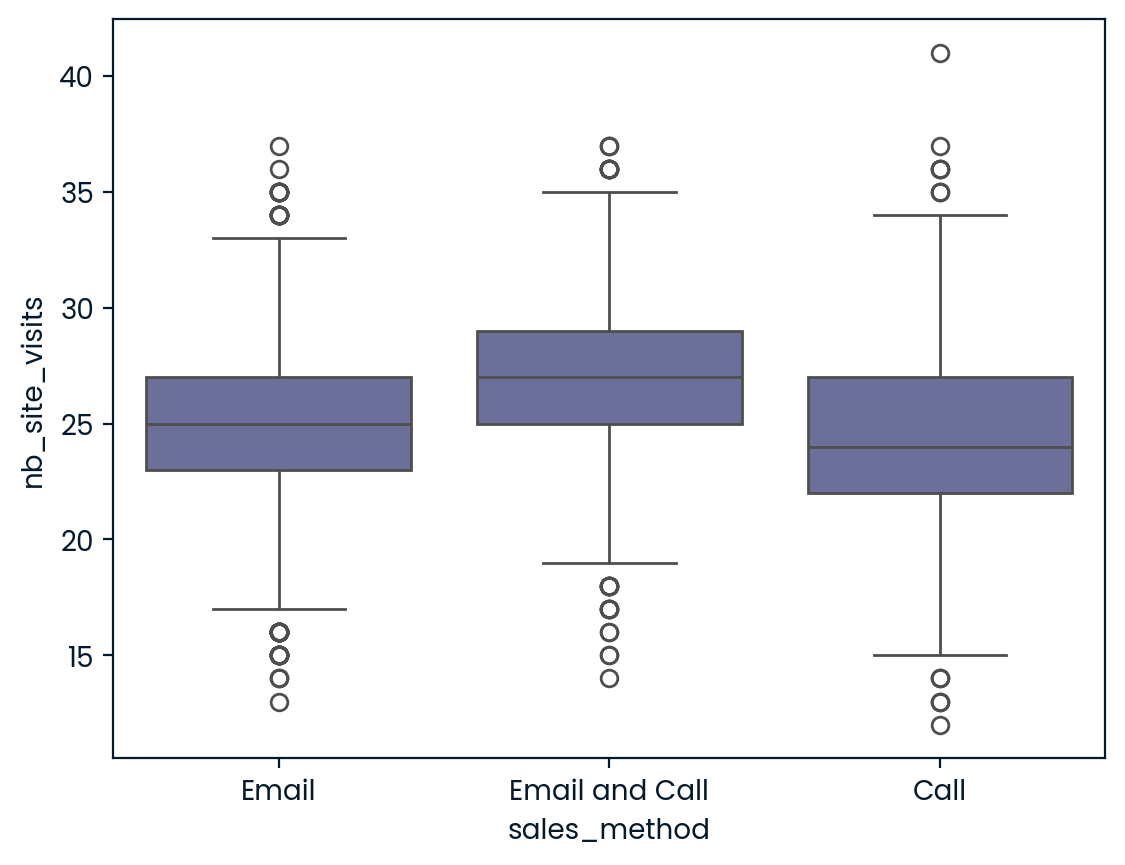

In [20]:
sns.boxplot(x="sales_method",y="nb_site_visits",data=df)

<AxesSubplot: xlabel='sales_method', ylabel='revenue'>

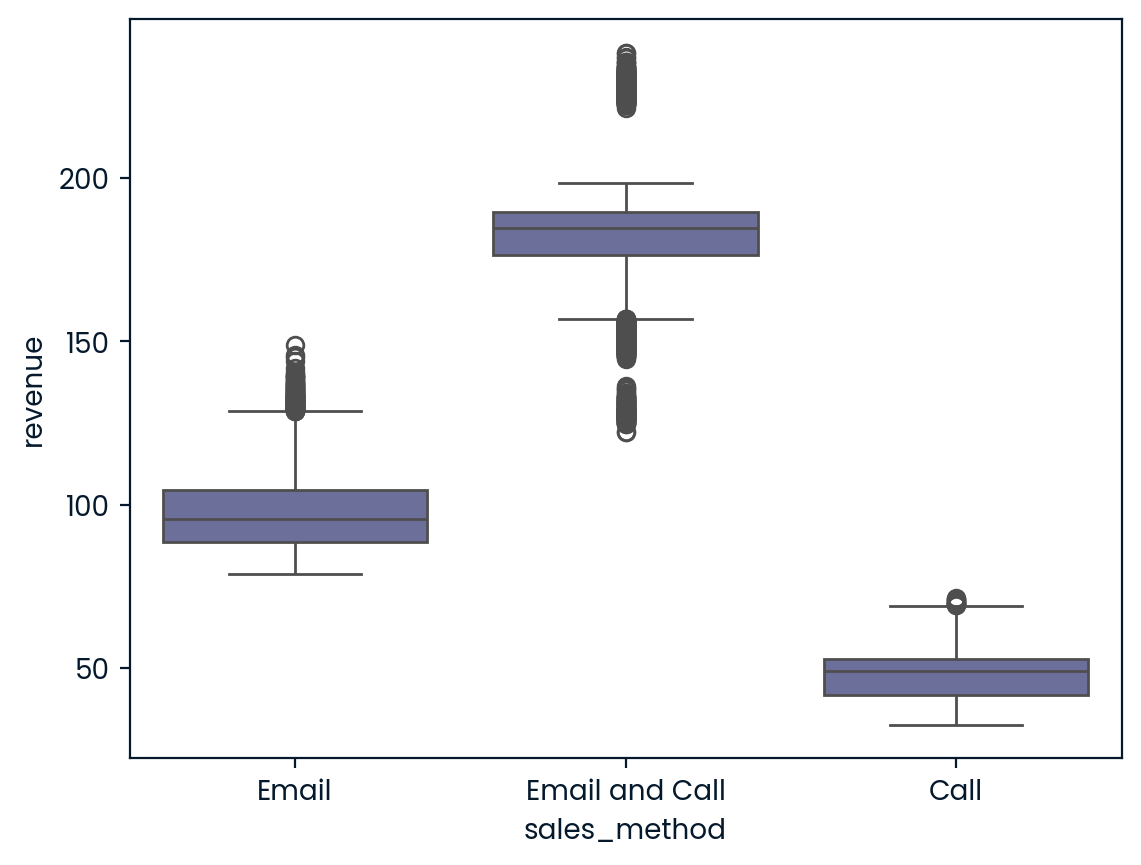

In [21]:
sns.boxplot(x="sales_method",y="revenue",data=df)

<AxesSubplot: xlabel='sales_method', ylabel='revenue'>

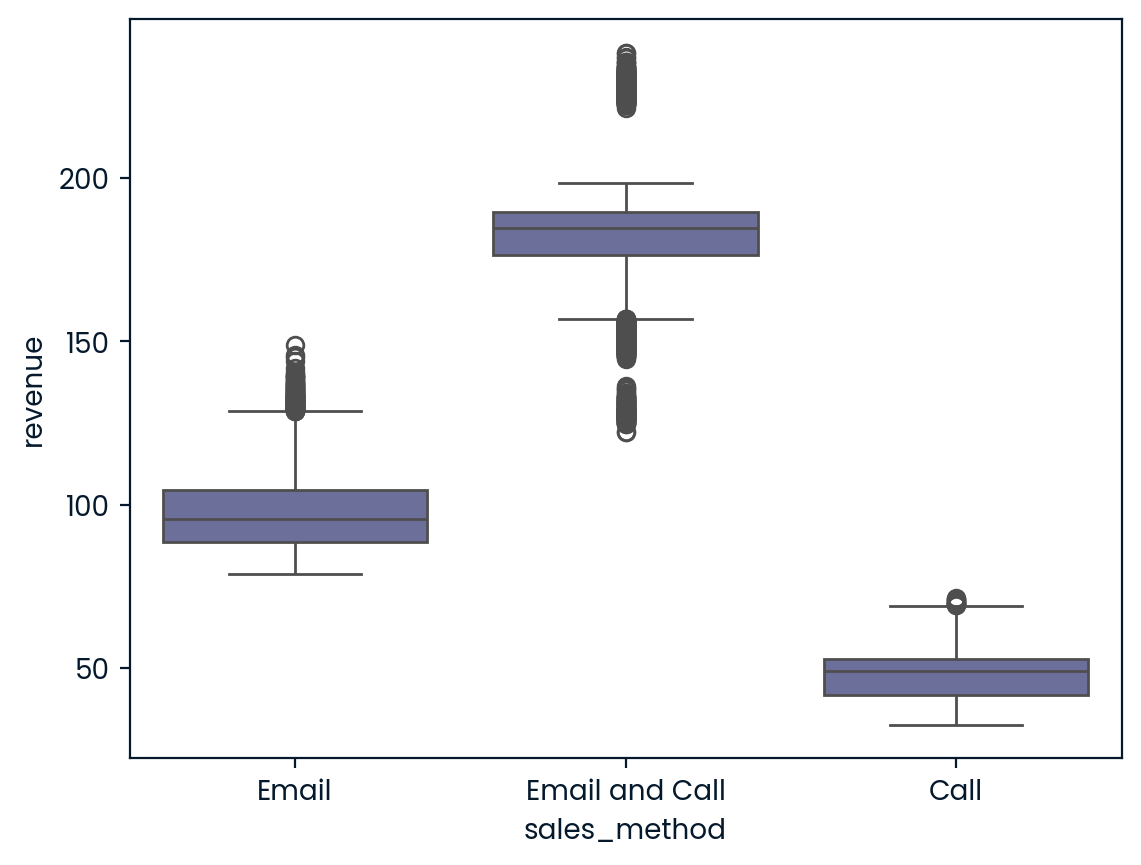

In [22]:
sns.boxplot(x="sales_method",y="revenue",data=df)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


In [24]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,95.58,0,24,Arizona
1,6,Email and Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,95.58,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# Data Validation
The validation results are summarized as follows:

- week: numeric values without missing values, matching the description. No cleaning is needed.
- sales_method: character values without missing values and 5 distinct models: 'Email', 'Email + Call','email', 'em + call and 'Call'. Need cleaning process involved renaming variations 'email' and 'em + call', 
- customer_id: unique values without missing values, matching the description. No cleaning is needed.
- nb_sold:  Numeric values, matching the description. No cleaning is needed.
- revenue: Numeric values with 1074 missing which is more than 5% from total. Need cleaning process to impute median group by sales_mathod since the distribution is skewed and there are outliers, and removing outliers
- years_as_customer: Numeric values without missing values, there are outliers 60 and 47 since that the company founded in 1984. Years customers 60 and 47 just impossible
- nb_site_visits: Numeric values without missing values, matching the description. No cleaning is needed.
- state: Character values without missing values, matching the description. No cleaning is needed.


After the data validation, the dataset contains 14414 rows and 8 columns without missing values.

## Exploratory Analysis

- How many customers were there for each approach?

Based on data most customers are obtained using the email method followed by call and Email + Call. Total Email : 7465, Call : 4961, Email and Call : 2572

In [25]:
df["sales_method"].value_counts()

Email             7465
Call              4961
Email and Call    2572
Name: sales_method, dtype: int64

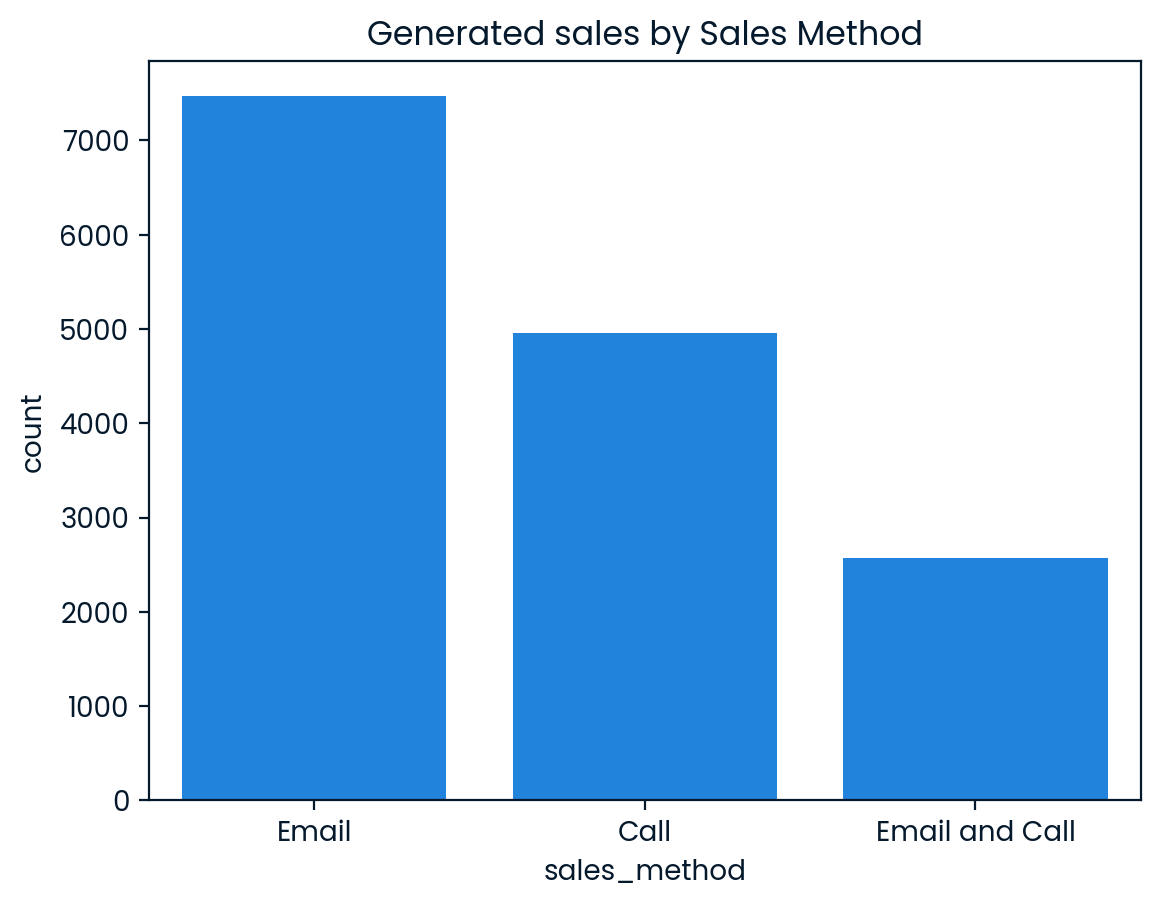

In [33]:
import seaborn as sns

sns.countplot(x="sales_method",data=df,order=df.sales_method.value_counts(ascending=False).index,palette=["#0384fc"])

plt.title('Generated sales by Sales Method')
plt.show()


- What does the spread of the revenue look like overall? And for each method?

So based Data on box plot overall, the spread is not symmetric, more right skewed.
for email method the spread is right skewed, email + call is left skewed and the call method right skewed but the spread closedly to median.

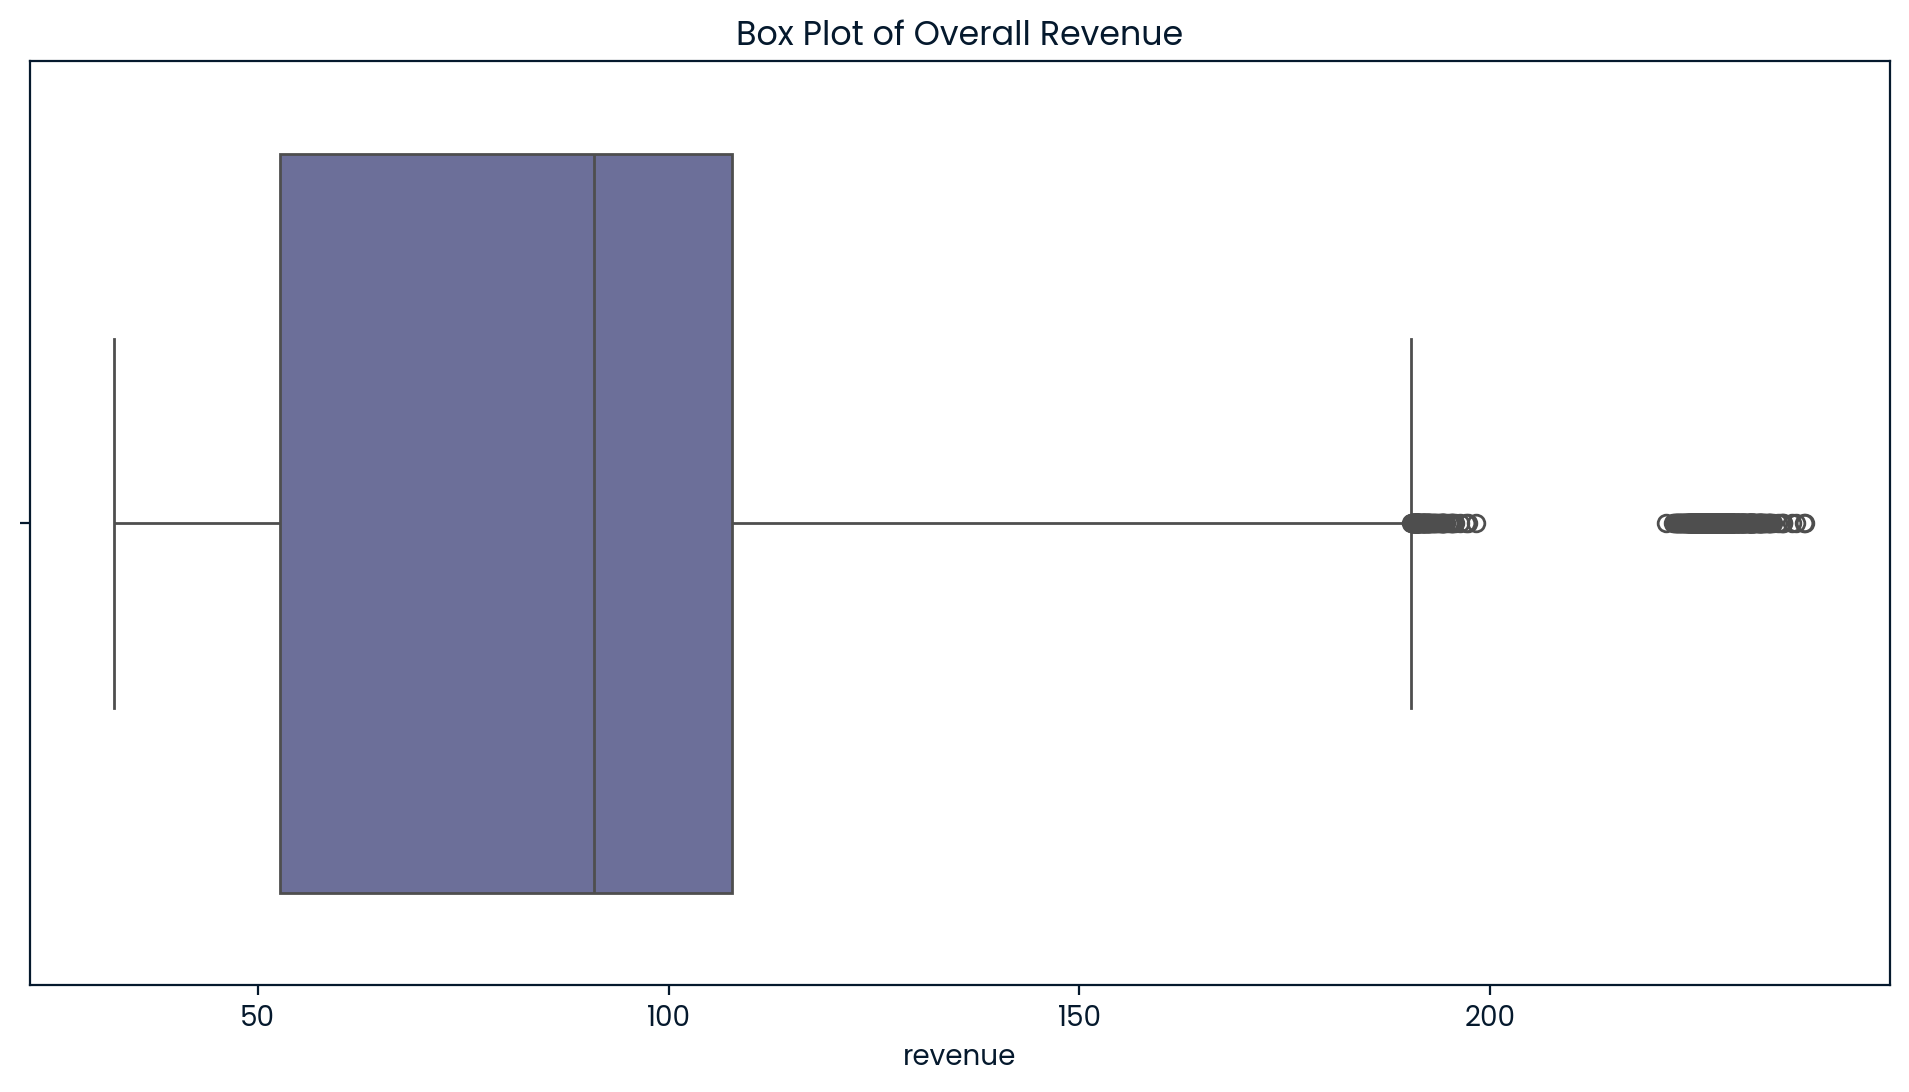

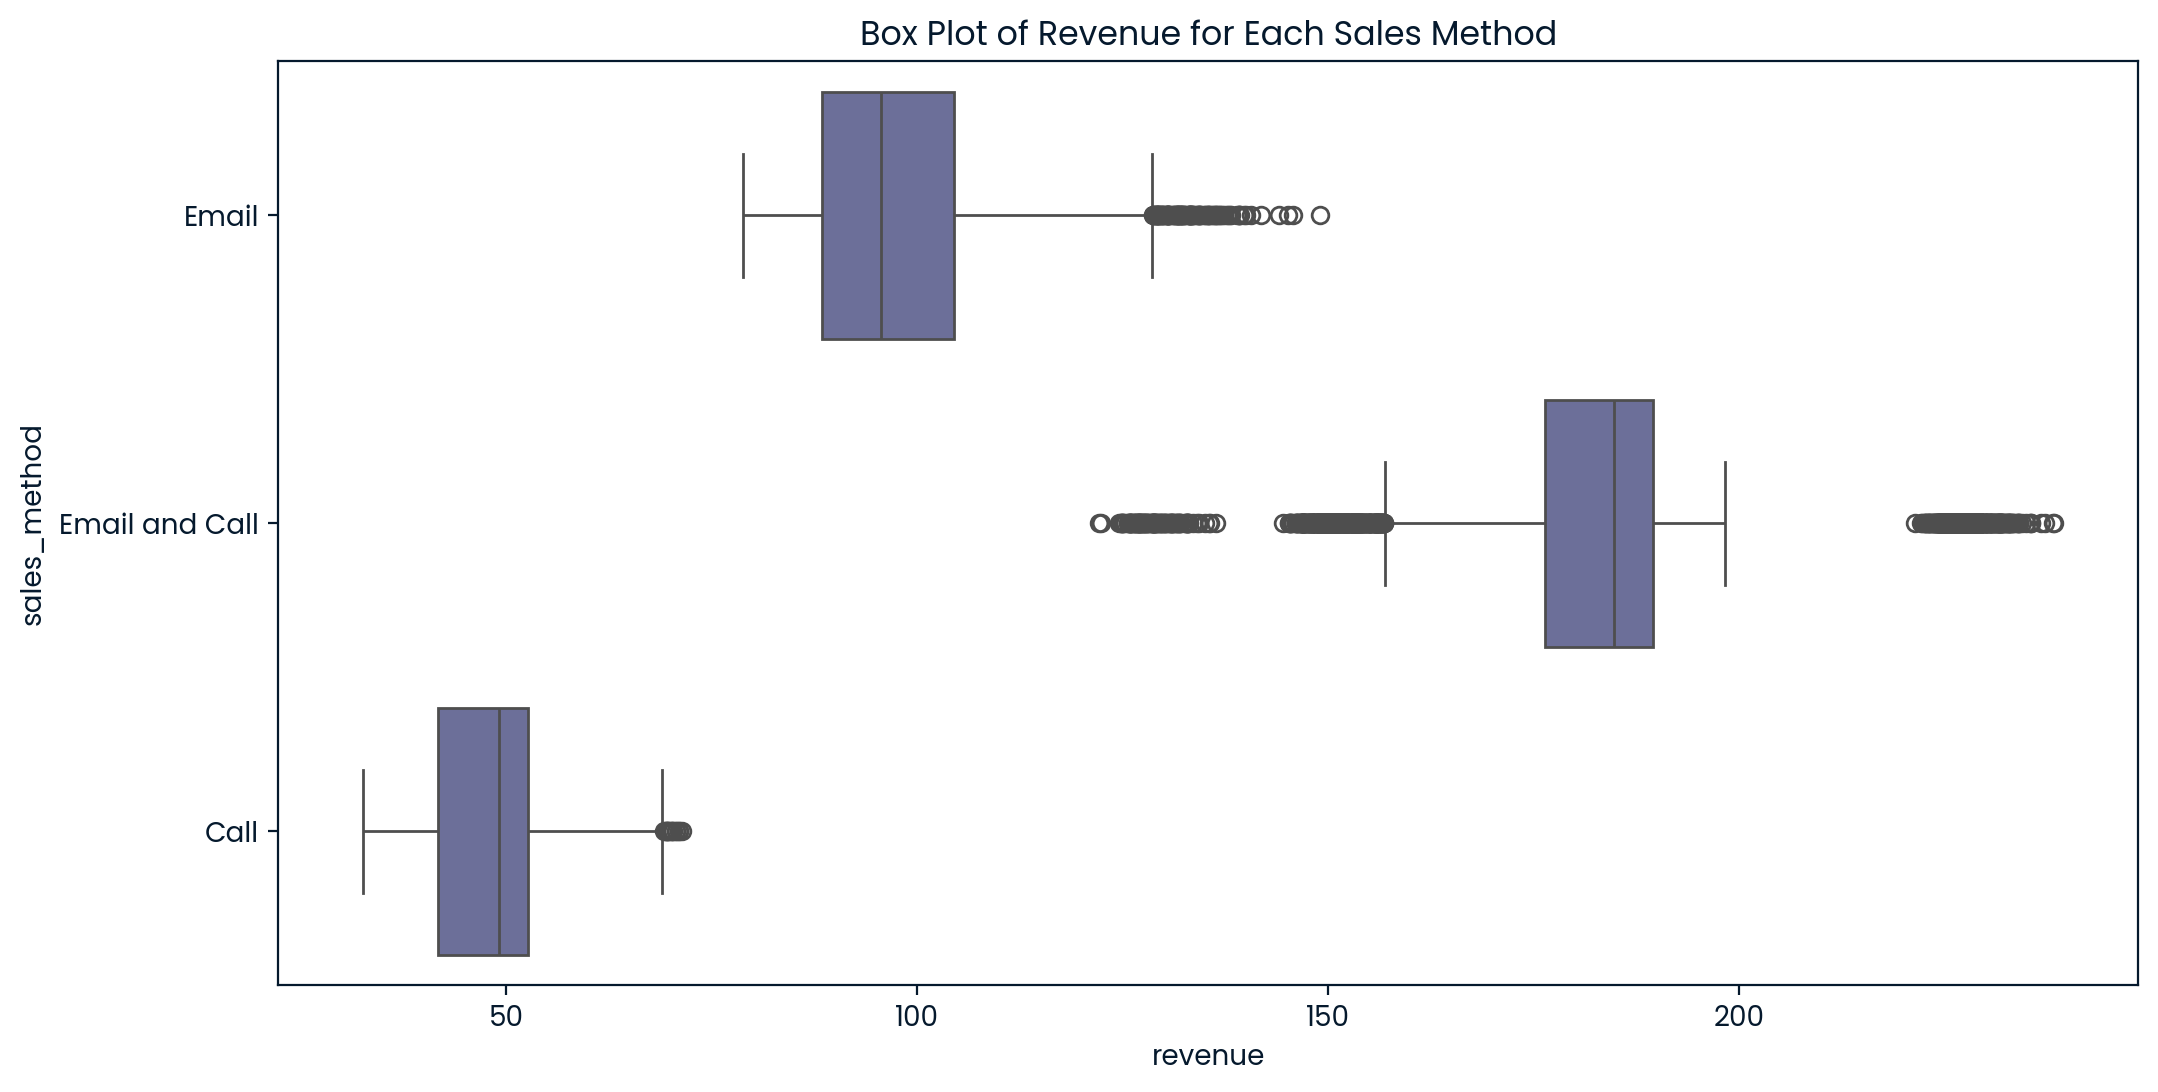

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(12, 6))
sns.boxplot(x='revenue', data=df)
plt.title('Box Plot of Overall Revenue')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='revenue', y='sales_method', data=df)
plt.title('Box Plot of Revenue for Each Sales Method')
plt.show()


- Was there any difference in revenue over time for each method?

There is a decrease in revenue over time from each method

In [48]:
table = pd.pivot_table(df,index=["year","sales_method"],values=["revenue"]
                     ,aggfunc="mean" )
table

revenue
year sales_method              
1985 Email            93.450000
     Email and Call  184.740000
1986 Call             40.640000
     Email            93.340000
1987 Email            80.770000
...                         ...
2023 Email            97.826598
     Email and Call  186.782366
2024 Call             49.388441
     Email            98.118747
     Email and Call  185.074821

[109 rows x 1 columns]

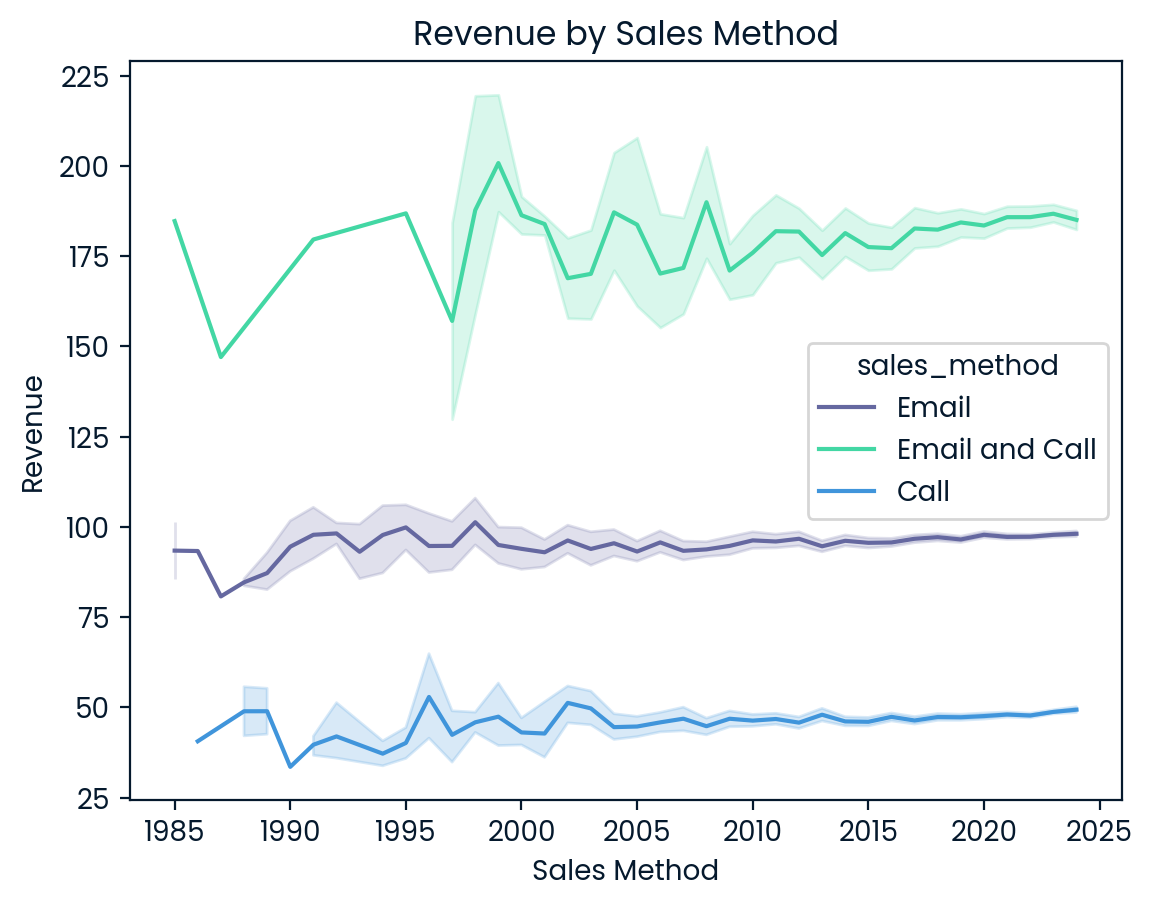

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
df["year"] = 2024 - df["years_as_customer"]

sns.lineplot(data=df,x="year",y="revenue",hue="sales_method")
plt.title('Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

<AxesSubplot: xlabel='week', ylabel='sales_method'>

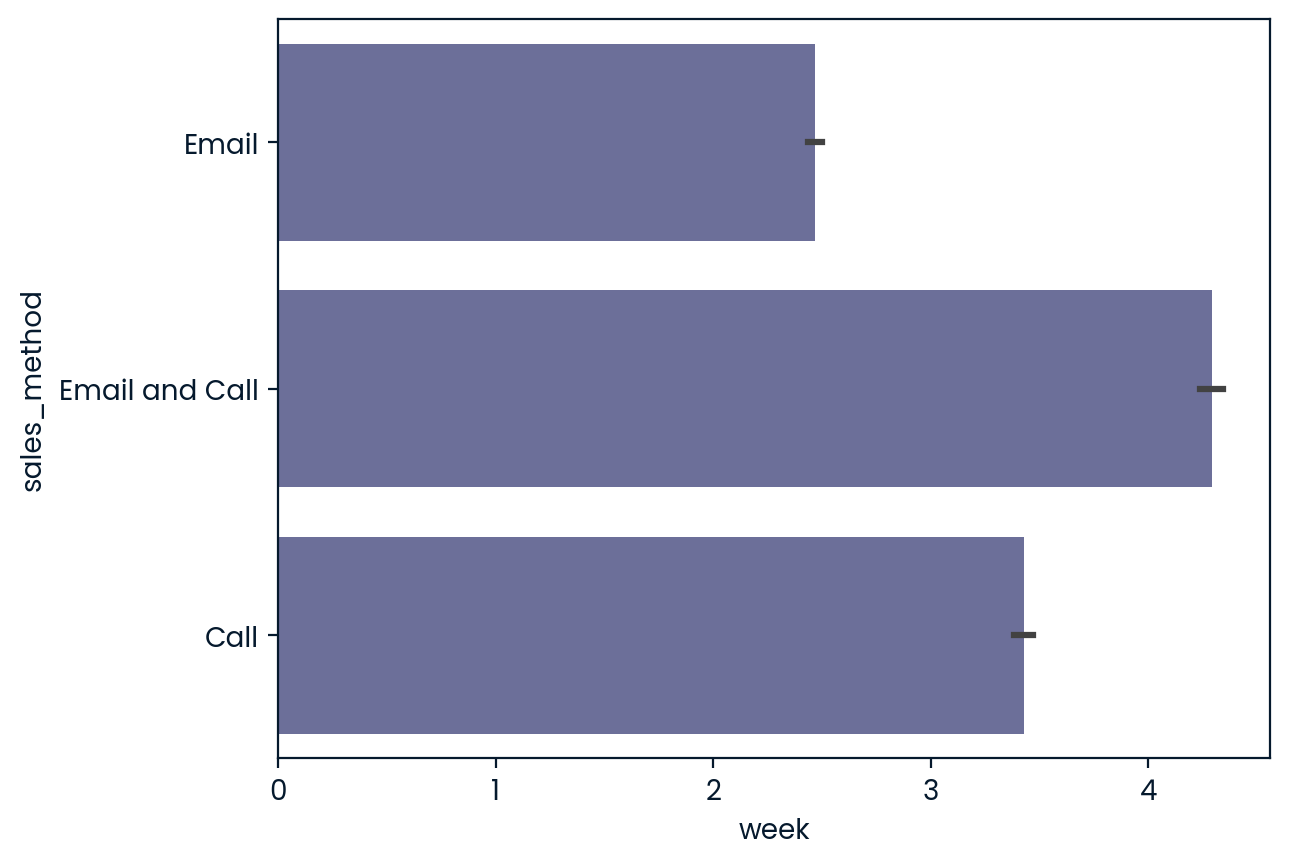

In [99]:
sns.barplot(data=df,x="week",y="sales_method")

<AxesSubplot: xlabel='nb_sold', ylabel='sales_method'>

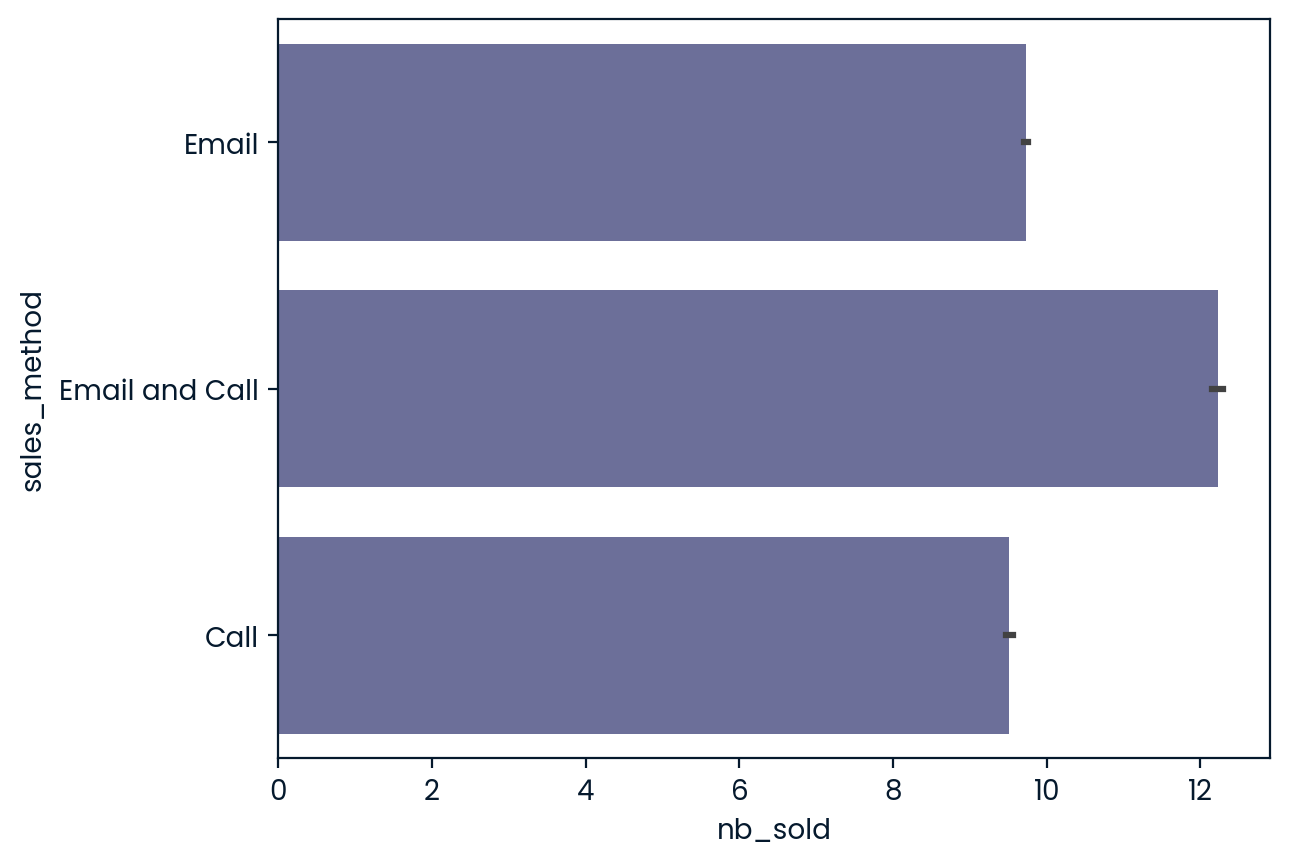

In [100]:
sns.barplot(data=df,x="nb_sold",y="sales_method")

## Business Metrics

- Since our goal is to make sure we are using the best technique to sell the new product effectively. I would recommend we use average revenue generated from the sales method as KPI.
- Based on the data provided, I would recommend continuing with Email and Call sales strategy, Because it has the highest average revenue.
- Although this method requires more time than the email-only method, it is still less time-consuming than the call-only and very effective resulting sold product and revenue.

## Recommendation

- For the following weeks, I would recommend we can focus on the following steps:    
    - Sales Method :
        - increase sales using the email + call method  
        - reduce sales method only with call customer
    - Feedback Collection:
        - Collect feedback from customers who have interacted with each sales method to understand their preferences, satisfaction levels, and suggestions for improvement sales method.
    - Training for Efficient Calls:
        - Provide targeted training for the sales team to enhance efficiency during phone calls without compromising the quality of customer interactions. Focus on effective communication and closing strategies.
    - Monitor and Adjust:
        - Continuously monitor performance metrics and customer responses from each sales method spesifically the revenue per sales method. 

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation